In [1]:
from dis import dis
from tkinter.tix import AUTO
from requests import head
import torch
import config
import os
from glob import glob
from shutil import copyfile
import pandas as pd
import re
import numpy as np
from math import sqrt
import math
import tensorflow as tf
from keras import regularizers
from tensorflow.keras import Model, Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from re import X
import numpy as np
import torch
import pandas as pd
from torch.nn.utils.rnn import pack_padded_sequence
from torch.utils.data import DataLoader
from CustomDataset import CustomRawDataset
from model_dispatcher import dispatch_model
# from model_dispatcher_cnn import dispatch_model
import config
from torch import nn
import os
from glob import glob
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datetime import date, timedelta, datetime
import time
import random
from torch.utils.tensorboard import SummaryWriter
from CustomDataset import custom_collate_fn
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,TimeDistributed
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\acer\AppData\Local\Temp\ipykernel_11884\4271784750.py:2: DeprecationWarning: The Tix Tk extension is unmaintained, and the tkinter.tix wrapper module is deprecated in favor of tkinter.ttk
  from tkinter.tix import AUTO


In [29]:
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed", "*", "*.csv"))
# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
data=df
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged.csv",index=False)
#df=pd.read_csv(r"D:\Research_Project\My_project_22\FEATURES_EXTRACTED\DISTANCES\both_hand_frontup_left_leg_frontup\aatish_both_hand_frontup_left_leg_frontup_trial1_interpolated.csv")
   
# data=df
# print(data.shape)
# target=data['54']
# data=data.drop(['54'],axis=1)
# # data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)

In [21]:
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged.csv")
data.head()
target=data['166']
data=data.drop(['166'],axis=1)
# data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)
print(data.shape)
print(target.shape)
data.head()

(12260, 166)
(12260,)


,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,0.324883,0.314224,0.475169,0.257537,0.224666,0.380845,0.480537,0.253687,0.224452,0.390823,...,1.597459,-0.140846,1.246003,0.169821,0.162107,-0.027582,0.081955,0.113375,0.031990,0.131282
1,0.322438,0.312178,0.470942,0.260437,0.229644,0.384718,0.450586,0.252057,0.222488,0.390271,...,1.614270,-0.147442,1.296214,0.211502,0.157114,-0.009114,0.106628,0.088090,0.029938,0.127583
2,0.321594,0.311465,0.469381,0.261410,0.231567,0.386289,0.442863,0.251537,0.221754,0.390644,...,1.619788,-0.148863,1.306293,0.224825,0.156264,-0.002401,0.115748,0.079567,0.029953,0.126045
3,0.321504,0.311379,0.469090,0.261484,0.231913,0.386717,0.444212,0.251446,0.221688,0.390763,...,1.619716,-0.148812,1.302433,0.224631,0.155941,-0.001148,0.116238,0.078291,0.030147,0.125562
4,0.321446,0.311360,0.469092,0.261522,0.232146,0.387123,0.445079,0.251438,0.222014,0.390721,...,1.619620,-0.149545,1.296863,0.226248,0.155132,-0.000888,0.115037,0.077394,0.030157,0.125631


In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    thresh = 5
    output= pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no ",1)
        print(vif)
        a = np.argmax(vif)
        print("Hiax vif is for variable no : ",a)
        if(vif[a]<=thresh):
            break
        if(i==1):
            output = x.drop(x.columns[a],axis=1)
            Vif = [variance_inflation_factor(output.values,3) for j in range(output.shape[1])]
        elif(1>1):
            output = output.drop(output . columns([a], axis=1))
            Vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return(output)


In [ ]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2



 # Convert to categorical data by converting data to integers
X_cat = X.astype(int)



 # Three features with highest chi-squared statistics are selected
chi2_features - SelectkBest(chi2, k = 15)

 X_kbest_features = chi2_features.fit_transform(X_cat, Y)


 # Reduced features

 print('Original feature number:', X_cat.shape[1])

 print('Reduced feature number:', X_kbest_features.shape[1])

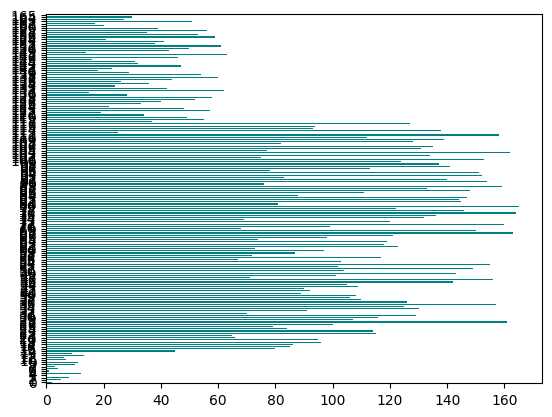

In [22]:
from skfeature.function.similarity_based import fisher_score

import matplotlib.pyplot as plt

%matplotlib inline

# Calculating scores
x=data.to_numpy()
y=target.to_numpy()

ranks = fisher_score.fisher_score(x, y,mode='rank')
# print(ranks)

# Plotting the ranks

feat_importances=pd.Series(ranks, data.columns[0:len(data.columns)])
feat_importances.plot(kind="barh", color = "teal")

plt.show()

In [6]:
selected_features = cal_vif(data)


c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Iteration no  1
[1837320890.6211386, 88114959301.32744, 398059871.3854003, 8706880.892114745, 1650902.1916357616, 28478468.468932193, 39922250.06743791, 9151207.478305956, 7734605.858327937, 1981966.4505041586, 50931152.38041462, 272128173.3331708, 52521949775.158264, 214574436.0224033, 201945133.54250816, 209599594.6219193, 39249723.53127704, 534297577.9326986, 504587445.7107678, 81893307888.57767, 75869552.89900811, 771003.6532875919, 93127590.75227182, 15291631.548414627, 981283283009.1505, 2605877300.739128, 91088081.00186655, 13859416.723926203, 3395744.455704866, 3191312.4786977842, 183256699.08743748, 43445451.139006495, 9051721.795807036, 25125518.827532016, 99497840.90751018, 2527658.9060063404, 1639052.4435672024, 123115679.52420898, 2921506.4487500293, 7368619.807600056, 6909594.90232841, 1357119068064.0337, 1556430.005429082, 686949.0795018084, 37855105.37255152, 38805030.09917282, 310431385.8158015, 184374713.6491092, 37762538.29086144, 17070014.015619364, 23114141.5490750

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,0.324883,0.314224,0.475169,0.257537,0.224666,0.380845,0.480537,0.253687,0.224452,0.390823,...,1.597459,-0.140846,1.246003,0.169821,0.162107,-0.027582,0.081955,0.113375,0.031990,0.131282
1,0.322438,0.312178,0.470942,0.260437,0.229644,0.384718,0.450586,0.252057,0.222488,0.390271,...,1.614270,-0.147442,1.296214,0.211502,0.157114,-0.009114,0.106628,0.088090,0.029938,0.127583
2,0.321594,0.311465,0.469381,0.261410,0.231567,0.386289,0.442863,0.251537,0.221754,0.390644,...,1.619788,-0.148863,1.306293,0.224825,0.156264,-0.002401,0.115748,0.079567,0.029953,0.126045
3,0.321504,0.311379,0.469090,0.261484,0.231913,0.386717,0.444212,0.251446,0.221688,0.390763,...,1.619716,-0.148812,1.302433,0.224631,0.155941,-0.001148,0.116238,0.078291,0.030147,0.125562
4,0.321446,0.311360,0.469092,0.261522,0.232146,0.387123,0.445079,0.251438,0.222014,0.390721,...,1.619620,-0.149545,1.296863,0.226248,0.155132,-0.000888,0.115037,0.077394,0.030157,0.125631


In [7]:
selected_features. head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,0.324883,0.314224,0.475169,0.257537,0.224666,0.380845,0.480537,0.253687,0.224452,0.390823,...,1.597459,-0.140846,1.246003,0.169821,0.162107,-0.027582,0.081955,0.113375,0.031990,0.131282
1,0.322438,0.312178,0.470942,0.260437,0.229644,0.384718,0.450586,0.252057,0.222488,0.390271,...,1.614270,-0.147442,1.296214,0.211502,0.157114,-0.009114,0.106628,0.088090,0.029938,0.127583
2,0.321594,0.311465,0.469381,0.261410,0.231567,0.386289,0.442863,0.251537,0.221754,0.390644,...,1.619788,-0.148863,1.306293,0.224825,0.156264,-0.002401,0.115748,0.079567,0.029953,0.126045
3,0.321504,0.311379,0.469090,0.261484,0.231913,0.386717,0.444212,0.251446,0.221688,0.390763,...,1.619716,-0.148812,1.302433,0.224631,0.155941,-0.001148,0.116238,0.078291,0.030147,0.125562
4,0.321446,0.311360,0.469092,0.261522,0.232146,0.387123,0.445079,0.251438,0.222014,0.390721,...,1.619620,-0.149545,1.296863,0.226248,0.155132,-0.000888,0.115037,0.077394,0.030157,0.125631


In [36]:
data,target=tree_based_classifier_feature_extraction(data,target)
data.head()

(12260, 26)


,51,102,105,106,107,109,110,112,116,122,...,143,145,146,148,149,160,161,163,164,165
0,0.413883,0.373833,0.375580,2.316167,0.380257,2.270467,0.446287,2.194800,0.469860,0.397397,...,0.30409,2.222067,0.446047,2.216000,0.346157,0.162107,-0.027582,0.113375,0.031990,0.131282
1,0.418007,0.378393,0.379317,2.317200,0.383360,2.277767,0.449207,2.210400,0.471243,0.401893,...,0.30823,2.230433,0.449470,2.224300,0.350710,0.157114,-0.009114,0.088090,0.029938,0.127583
2,0.419052,0.379813,0.380610,2.317700,0.384443,2.280433,0.451327,2.217000,0.472687,0.403303,...,0.30970,2.233733,0.450647,2.227500,0.352113,0.156264,-0.002401,0.079567,0.029953,0.126045
3,0.419222,0.379817,0.380717,2.317867,0.384600,2.280833,0.452303,2.217733,0.473447,0.403313,...,0.30990,2.234267,0.450833,2.228000,0.352107,0.155941,-0.001148,0.078291,0.030147,0.125562
4,0.419968,0.379800,0.380730,2.317967,0.384773,2.280933,0.451847,2.216367,0.472880,0.403287,...,0.30999,2.234367,0.451043,2.228167,0.352097,0.155132,-0.000888,0.077394,0.030157,0.125631


In [37]:
len1=data.shape[1]
l1=list(range(0,len1))
l2=[]
for i in l1:
    i=str(i)
    l2.append(i)
l1=l2
    
data.columns=l1
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.413883,0.373833,0.375580,2.316167,0.380257,2.270467,0.446287,2.194800,0.469860,0.397397,...,0.30409,2.222067,0.446047,2.216000,0.346157,0.162107,-0.027582,0.113375,0.031990,0.131282
1,0.418007,0.378393,0.379317,2.317200,0.383360,2.277767,0.449207,2.210400,0.471243,0.401893,...,0.30823,2.230433,0.449470,2.224300,0.350710,0.157114,-0.009114,0.088090,0.029938,0.127583
2,0.419052,0.379813,0.380610,2.317700,0.384443,2.280433,0.451327,2.217000,0.472687,0.403303,...,0.30970,2.233733,0.450647,2.227500,0.352113,0.156264,-0.002401,0.079567,0.029953,0.126045
3,0.419222,0.379817,0.380717,2.317867,0.384600,2.280833,0.452303,2.217733,0.473447,0.403313,...,0.30990,2.234267,0.450833,2.228000,0.352107,0.155941,-0.001148,0.078291,0.030147,0.125562
4,0.419968,0.379800,0.380730,2.317967,0.384773,2.280933,0.451847,2.216367,0.472880,0.403287,...,0.30999,2.234367,0.451043,2.228167,0.352097,0.155132,-0.000888,0.077394,0.030157,0.125631


In [43]:
data['26']=target
data.head()
data.shape
# data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\tree_classifier_extracted.csv",index=False)


(12260, 27)

In [44]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :26], sequences[end_ix-1, 26:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [48]:
# raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_modified", "*", "*.csv"))
# # print(raw_angle_files_1)
# all_filenames = [i for i in raw_angle_files_1]
# df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\tree_classifier_extracted.csv")
# print(df.shape)
# df = df.sample(frac = 1)
# # df.iloc[1:10,:]
data=pd.get_dummies(data,columns=['26'])
data=data.to_numpy()
x,y=split_sequences(data,6)
# x=x[None:]
# print(x.shape)
# print(y.shape)
# data=data.to_numpy()
print(data.shape)

# y=data.iloc[:,26:]
# x=data.iloc[:,:26]
# # x=data[-1:26]
# print(x.shape)
# print(y.shape)
# x=x.to_numpy()
# y=y.to_numpy()
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(type(y_train))



model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(6,26)))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu'))
model.add(layers.BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.summary()


# model.summary()
# # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
print(y_train)
print(y_train.shape)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# # print(x.shape)
history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
results = model.evaluate(x_test, y_test)
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
# print(y_pred)
cf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(classification_report(y_test,y_pred))

(12260, 36)
(9804, 6, 26)
(9804, 10)
<class 'numpy.ndarray'>
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 4, 64)             5056      
                                                                 
 conv1d_5 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 dropout_2 (Dropout)         (None, 2, 64)             0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 100)               6500

In [49]:
cf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(classification_report(y_test,y_pred))

Confusion matrix
 [[199   0  32   0   4   0   3   0   0   5]
 [ 36 156   0   3   0   1  11  20  11   0]
 [  4   0 238   0   0   0   1   0   8   1]
 [  2   6  33 226   1   0   0   2   0   1]
 [  0   0   4   0 267   1   4   2   0   1]
 [  0   0   0   0  17 163  11  30   2   0]
 [  0   0   1   0   5   1 228   7   1   4]
 [  0   0   0   0   5   0   5 229   0   4]
 [  0   0   4   0   2   0   2   5 253   5]
 [  0   0   1   0   7   0   4   3  17 152]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       243
           1       0.96      0.66      0.78       238
           2       0.76      0.94      0.84       252
           3       0.99      0.83      0.90       271
           4       0.87      0.96      0.91       279
           5       0.98      0.73      0.84       223
           6       0.85      0.92      0.88       247
           7       0.77      0.94      0.85       243
           8       0.87      0.93      0.90       271
          